# 分散分析
ここでは３つ以上の平均値を比較するための統計的方法として、分散分析を紹介する。

In [243]:
import pandas as pd
import numpy as np

In [244]:
data = pd.read_csv('../data/teaching_method.csv')

In [245]:
data.head()

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,teaching_method
0,1,大村,男,嫌い,好き,13,6,10,C
1,2,本多,男,嫌い,好き,14,10,13,B
2,3,川崎,男,好き,好き,7,6,8,B
3,4,多村,男,好き,好き,12,10,15,A
4,5,松中,男,嫌い,嫌い,10,5,8,B


In [246]:
A = data[data.teaching_method == 'A']
B = data[data.teaching_method == 'B']
C = data[data.teaching_method == 'C']
D = data[data.teaching_method == 'D']

In [247]:
A

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,teaching_method
3,4,多村,男,好き,好き,12,10,15,A
6,7,柴原,男,嫌い,嫌い,8,5,9,A
10,11,高谷,女,好き,好き,9,11,18,A
11,12,杉内,女,嫌い,好き,6,6,14,A
12,13,和田,女,好き,好き,10,11,18,A


In [248]:
B

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,teaching_method
1,2,本多,男,嫌い,好き,14,10,13,B
2,3,川崎,男,好き,好き,7,6,8,B
4,5,松中,男,嫌い,嫌い,10,5,8,B
14,15,大隣,女,嫌い,好き,5,7,12,B
18,19,佐藤,女,嫌い,嫌い,12,7,7,B


In [249]:
C

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,teaching_method
0,1,大村,男,嫌い,好き,13,6,10,C
5,6,小久保,男,嫌い,嫌い,6,3,6,C
13,14,新垣,女,嫌い,嫌い,12,9,11,C
16,17,斎藤,女,嫌い,嫌い,8,8,7,C
17,18,柳瀬,女,嫌い,嫌い,8,7,12,C


In [250]:
D

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,teaching_method
7,8,井手,男,嫌い,嫌い,15,9,10,D
8,9,田上,男,嫌い,嫌い,4,3,7,D
9,10,松田,男,好き,嫌い,14,3,3,D
15,16,水田,女,好き,嫌い,12,5,5,D
19,20,馬原,女,嫌い,嫌い,15,9,7,D


上記の表は指導法（４つの指導法で計20人）ごとの点数を表示してる。 ここでは20人の得点そのものではなく、それぞれの指導法をうける全ての母集団としたときに、その母集団において、それぞれの指導法ごとに求めたテスト得点の平均値に違いがあるかどうかということに関心があるとする。母集団ではこれら４つの指導法の間に平均値の差はあるのか？標本の群間で平均値の差はあると言っても、母集団で平均値に差があるとは必ずしも言えない。<b>この得られた標本が母平均の等しい4群から抽出される可能性が高いかどうかを検討するための検定が分散分析である。</b>分散分析という名前だが、平均値差の検定である（t検定は３つ以上の平均値差の検定には使えない）。

## 一元配置分散分析（対応なし）を実行する
統計的仮説検定の一般的な手順の通りに分散分析を実行する。分散分析は今まで検定とは複雑な計算のためライブラリを使って計算する。

### (1)帰無仮説と対立仮説の設定
- 帰無仮説$H_0$：4群の母平均は等しい（指導法の違いによる統計学の学習効果に差はない）
- 対立仮説$H_1$：4群の母平均は等しくない（指導法の違いによる統計学の学習効果に差がある）
<p>
ここで注意しなければならないのは、例えば4群のうち一つだけ母平均と異なる（その他３つは母平均と等しい）ような場合でも対立仮説が成立することである。
</p>

### (2)検定統計量の選択
分散分析では検定統計量として次のFを利用する
$$
F = \frac{群間平方和/群間の自由度}{群内平方和/群内の自由度}
$$
この検定統計量は帰無仮説のもとで、すなわち全ての群の母平均が等しいときにはF分布という確率分布に従う。F分布は自由度を２つ持つ。これは$df_1$と$df_2$と書かれたり、分子の自由度、分母の自由度と呼ばれたりする。F分布を書いてみる。下記は分子の自由度を3、分母の自由度を16のF分布を描いたものである。

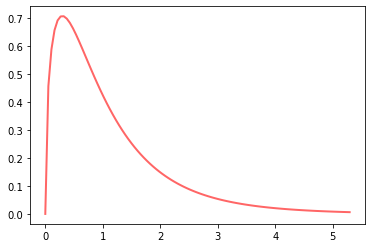

In [251]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
dfn = 3  #　分子の自由度
dfd = 16 # 分母の自由度 
x = np.linspace(stats.f.ppf(1e-10, dfn, dfd),stats.f.ppf(0.99, dfn, dfd), 100)
plt.plot(x, stats.f.pdf(x, dfn, dfd), 'r-', lw=2, alpha=0.6, label='f pdf')

### (3)有意水準$\alpha$の決定
ここでは有意水準は5%、つまり$\alpha=0.05$とする。上図のようF分布は正の値しか取らないため分散分析は常に片側検定となる。

### (4)検定統計量の実現値を求める
Pythonによる分散分析の関数は以下である。

In [10]:
from scipy import stats

In [11]:
f, p = stats.f_oneway(A.stats_test2,B.stats_test2,C.stats_test2,D.stats_test2)
print("F=%f, p-value = %f"%(f,p))

F=7.111111, p-value = 0.002988


### (5)帰無仮説の棄却or採択の決定
p値が5%以下のため帰無仮説は棄却される。

## 平方和の分解
ここでは平方和の分解について説明する。

In [12]:
data = pd.DataFrame([A.stats_test2.values, B.stats_test2.values, C.stats_test2.values, D.stats_test2.values]).T.values

In [13]:
data

array([[15, 13, 10, 10],
       [ 9,  8,  6,  7],
       [18,  8, 11,  3],
       [14, 12,  7,  5],
       [18,  7, 12,  7]])

In [14]:
group_mean = data.mean(axis=0) # 群平均

In [15]:
all_mean = data.mean() #全平均

In [16]:
all_mean_matrix = np.full((5,4), 10) # 全平均行列

In [17]:
group_mean_matrix = np.tile(group_mean, (5, 1)) # 群平均行列

In [18]:
# 全体 = データ - 全平均行列
a = data - all_mean_matrix

In [19]:
# 群間 = 群平均行列 - 全平均行列
# 各群ごとに全平均からどの程度離れているかを出す
g = group_mean_matrix - all_mean_matrix

In [20]:
g

array([[ 4.8, -0.4, -0.8, -3.6],
       [ 4.8, -0.4, -0.8, -3.6],
       [ 4.8, -0.4, -0.8, -3.6],
       [ 4.8, -0.4, -0.8, -3.6],
       [ 4.8, -0.4, -0.8, -3.6]])

上記は平均からの差なので指導法Aと使うと平均より4.8点押し上げられたと解釈できる。逆に指導法Bは平均点より-0.4のため引き下げられたとみることができる。このように条件の違いで平均点を押し上げたり引き下げたりする力を効果という。どの群も平均が同じであれば、この群間の値は全て0になるが、その場合は群の違いによって効果がないということである。したがって分散分析は母集団において群の違いによる効果の有無を検定する手法であるという見方ができる。

In [21]:
# 郡内 = 全データ - 群平均行列
g_in = data - group_mean_matrix

In [22]:
g_in

array([[ 0.2,  3.4,  0.8,  3.6],
       [-5.8, -1.6, -3.2,  0.6],
       [ 3.2, -1.6,  1.8, -3.4],
       [-0.8,  2.4, -2.2, -1.4],
       [ 3.2, -2.6,  2.8,  0.6]])

郡内という行列は全データのここの要素からその要素が属する群の平均を引いたもの。それぞれのデータがその群の平均からどれくらい離れているかを示している。もし、同じ群の中のデータが全て同じであれば、郡内は0になる。全員の得点が全平均から「群間」で見られた効果によって一律に押し上げられたり引き下げられたりしたあとで、「郡内」の値は指導法との相性やテストのときの体調など様々な要因によって生じた変動の大きさと見なすことができる。

In [23]:
a**2 # 各データが全平均に近いほど小さく、遠いほど大きくなる

array([[25,  9,  0,  0],
       [ 1,  4, 16,  9],
       [64,  4,  1, 49],
       [16,  4,  9, 25],
       [64,  9,  4,  9]])

In [24]:
g**2

array([[23.04,  0.16,  0.64, 12.96],
       [23.04,  0.16,  0.64, 12.96],
       [23.04,  0.16,  0.64, 12.96],
       [23.04,  0.16,  0.64, 12.96],
       [23.04,  0.16,  0.64, 12.96]])

In [25]:
g_in**2

array([[ 0.04, 11.56,  0.64, 12.96],
       [33.64,  2.56, 10.24,  0.36],
       [10.24,  2.56,  3.24, 11.56],
       [ 0.64,  5.76,  4.84,  1.96],
       [10.24,  6.76,  7.84,  0.36]])

In [26]:
a_sum = np.sum(a**2)
g_sum = np.sum(g**2)
g_in_sum = np.sum(g_in**2)

In [27]:
a_sum # データ全体のばらつき

322

In [28]:
g_sum # 群の平均値のばらつきが大きいほど大きい値になる。群の違いによって生じるばらつき

184.00000000000003

In [29]:
g_in_sum # 同じ群の中の個人差の大きさを表す

138.0

群の平均値の違いをデータのばらつきによって説明しようとするのが分散分析である。
* 群間の自由度=群の数-1
* 郡内の自由度=(各群のデータ数-1)を全ての群について合計したもの
* 全体の自由度=全データ数-1

In [30]:
g_df = data.shape[1] - 1 # 群間自由度
g_in_df = (data.shape[0] - 1)*data.shape[1] # 郡内自由度
a_df = data.shape[0]*data.shape[1] - 1 # 全体自由度

In [31]:
print(g_df)
print(g_in_df)
print(a_df)

3
16
19


In [32]:
g_mean = g_sum / g_df # 群間平均平方
g_in_mean = g_in_sum / g_in_df # 群間平均平方
a_mean = a_sum / a_df

In [33]:
print(g_mean)
print(g_in_mean)
print(a_mean)

61.33333333333334
8.625
16.94736842105263


検定統計量Fを求める
* 分子=（群間平方和）/（群間の自由度）=群間の平均平方
* 分母=（群内平方和）/（群内の自由度）=群内の平均平方

In [34]:
F = g_mean / g_in_mean
F

7.1111111111111125

## 多重比較（Tukeyの方法）
<p>一元配置分散分析（対応なし）で行った検定では「４つの指導法の母平均は等しくない」ということが分かったが、具体的にどの指導法とどの指導法の間に差があるかまではわからない。このために多重比較という方法を用いる必要がある。ここではTukey(テューキー)の方法と呼ばれる多重比較の方法を示す。</p>
<p>各群におけるデータ数nが等しく、各群の母分散も等しいと仮定して次式により検定統計量qを求める</p>
$$
q = \frac{|比較する群の平均値差|}{\sqrt{郡内の平均平方/各群のデータ数}}
$$
指導法データの例で、比較してみよう。

In [35]:
q = np.abs(A.stats_test2.mean() - D.stats_test2.mean()) / np.sqrt(g_in_mean/ len(data))

In [36]:
q

6.3956506960658

こうして検定統計量qの実現値が6.395と求められた、続いてpairwise_tukeyhsd関数を利用する。

In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [126]:
data_arr = np.hstack( (A.stats_test2,B.stats_test2,C.stats_test2,D.stats_test2) ) # すべてのデータを結合
ind_arr = np.repeat(list('ABCD'),len(A))   # 名称をリスト

print(data_arr)
print(ind_arr)


[15  9 18 14 18 13  8  8 12  7 10  6 11  7 12 10  7  3  5  7]
['A' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'D' 'D' 'D'
 'D' 'D']


In [116]:
print(pairwise_tukeyhsd(data_arr,ind_arr))   # 結果を出力する

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     -5.2 0.0563 -10.5145  0.1145  False
     A      C     -5.6 0.0371 -10.9145 -0.2855   True
     A      D     -8.4 0.0018 -13.7145 -3.0855   True
     B      C     -0.4    0.9  -5.7145  4.9145  False
     B      D     -3.2  0.345  -8.5145  2.1145  False
     C      D     -2.8 0.4574  -8.1145  2.5145  False
-----------------------------------------------------


上の表をみると、AとDの0.0018であり有意水準0.05よりも小さいことから有意差ありと判断できる。同様にみるとAとCも有意差がある。

## 一元配置分散分析（対応あり）
一元配置分散分析（対応あり）を適用するのは、以下の例題のようなデータである。5人の学生それぞれについて３つの測定値がある。このように同じ被験者が複数の条件を経験するようなデータ（被験者内計画データ）は対応あるデータとなる。

In [167]:
import pandas as pd
plan_data = pd.DataFrame(
    [
        ['田中', 7, 5, 8],
        ['岸', 8, 4, 6],
        ['大引', 9, 7, 7],
        ['吉川', 5, 1, 2],
        ['萩野', 6, 3, 5],
    ],
    columns=['学生','線形代数','微分積分','確率統計']
)
plan_data
# 大学の理工学系学部の1年生5人に線形代数、微分積分、確率統計に対する好感度を評定してもらったデータ。
#３つの数学科目に対する好意度について有意な差があると言えるか？分散分析により確認しよう（有意水準は5%）

,学生,線形代数,微分積分,確率統計
0,田中,7,5,8
1,岸,8,4,6
2,大引,9,7,7
3,吉川,5,1,2
4,萩野,6,3,5


## 対応がないものとみなして分散分析をしてみる
一元配置分散分析（対応なし）で扱った指導法の違いによるテスト得点のデータは２０個のデータは全て異なる人から得られたものであった。
一方今回のデータは、データの横の並びは同じ学生が回答したものである。同じ人から３科目のデータが得られていることは気にせず、対応のない一元配置分散分析を行ってみる。
* 帰無仮説$H_0$:３科目の好感度の母平均は等しい
* 対立仮説$H_1$:３科目の好感度の母平均は等しくない

In [43]:
import numpy as np
from scipy import stats

In [139]:
stats.f_oneway(plan_data['線形代数'], plan_data['微分積分'], plan_data['確率統計'])

F_onewayResult(statistic=2.6406250000000004, pvalue=0.11210798800331405)

分散分析の結果をみるとFが2.64でp値が0.1121 > 0.05なので有意水準5％より有意な差がない。一般に対応のあるデータで対応あることを考慮せずに検定を行うと検定力が低下して、有意な結果が得られにくくなる。そこで次は対応を考慮した分析を行う。

## 一元配置分散分析（対応あり）を実行する

### (1)帰無仮説と対立仮説の設定
* 帰無仮説$H_0$:３科目の好感度の母平均は等しい
* 対立仮説$H_1$:３科目の好感度の母平均は等しくない

## (2)検定統計量の選択
分散分析では検定統計量としてFを利用する
$$
F = \frac{条件平方和/条件の自由度}{残差平方和/残差の自由度}
$$
分子の条件平方和、条件の自由度は対応のない一元配置分散分析の群間平方和、群間の自由度と全く同じものである。この例ではそれぞれの評定者が比較したい３科目全てに回答しているので、「群」の比較ではなく「条件」の比較となっているため呼び名を変えている

## (3)有意水準$\alpha$の決定
ここでは有意水準は5%、つまり$\alpha=0.05$とする。F分布は正の値しか取らないため分散分析は常に片側検定となる。

### (4)検定統計量の実現値を求める

In [140]:
plan_data

,学生,線形代数,微分積分,確率統計
0,田中,7,5,8
1,岸,8,4,6
2,大引,9,7,7
3,吉川,5,1,2
4,萩野,6,3,5


In [239]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

algebra=plan_data['線形代数'].to_list()
calculus = plan_data['微分積分'].to_list()
statistics=plan_data['確率統計'].to_list()
students=plan_data['学生'].to_list()
favorness = np.array(algebra+calculus+statistics)
condition = np.repeat(['線形代数','微分積分','確率統計'],len(algebra))
subjects = np.array(students+students+students)
df = pd.DataFrame({'好意度':favorness,'科目':condition,'人':subjects})

In [240]:
df

,好意度,科目,人
0,7,線形代数,田中
1,8,線形代数,岸
2,9,線形代数,大引
3,5,線形代数,吉川
4,6,線形代数,萩野
5,5,微分積分,田中
6,4,微分積分,岸
7,7,微分積分,大引
8,1,微分積分,吉川
9,3,微分積分,萩野


In [241]:
import statsmodels.stats.anova as anova
# 科目による好感度の差をみる
aov=anova.AnovaRM(df, '好意度','人',['科目'])
result=aov.fit()
print(result)

             Anova
   F Value Num DF Den DF Pr > F
-------------------------------
科目 14.6957 2.0000 8.0000 0.0021



In [242]:
# 人による好感度の差をみる
aov=anova.AnovaRM(df, '好意度','科目',['人'])
result=aov.fit()
print(result)

            Anova
  F Value Num DF Den DF Pr > F
------------------------------
人 14.6957 4.0000 8.0000 0.0009



## (5)帰無仮説の棄却 or 採択の決定
p値をみると0.0021のため5%水準で有意差があることがわかる。

対応を考慮するとFの分母である残差の平均平方の値が小さくなるため、Fの値は大きくなり結果として有意になりやすい。なぜ対応を考慮すると残差の平均平方が小さくなるかというと、対応を無視したときの残差のばらつきから個人差によるばらつきを取り除くことができるから。

## 平方和の分解と自由度の計算
* 一元配置分析（対応なし）
    - 全体平方和=群間平方和+郡内平方和
* 一元配置分析（対応あり）
    - 全体平方和=条件平方和+個人差平方和+残差平方和
    
対応なしの郡内平方和が対応ありでは個人差平方和と残差平方和に分解される。個人差平方和とは個人の違いにより説明できる平方和のことである。同じ人が複数の条件で測定されることでデータには個人の特徴が反映されることがある。具体的にはある人からは一貫して高い値が得られ、また別の人は一貫して低い値が得られるというものである。そういった個人差によって生じるばらつきが個人平方和ということである。以下では対応のない場合と同様、平方和の分解の手順を説明する。

In [290]:
all_num_data = plan_data.drop('学生', axis=1).values

In [291]:
subject_mean = all_num_data.mean(axis=0)
subject_mean

array([7. , 4. , 5.6])

In [292]:
person_mean = all_num_data.mean(axis=1)
person_mean

array([6.66666667, 6.        , 7.66666667, 2.66666667, 4.66666667])

In [294]:
all_mean = all_num_data.mean()
all_mean

5.533333333333333

In [306]:
# 全平均行列
all_mean_matrix = np.full(all_num_data.shape, all_mean) 
all_mean_matrix

array([[5.53333333, 5.53333333, 5.53333333],
       [5.53333333, 5.53333333, 5.53333333],
       [5.53333333, 5.53333333, 5.53333333],
       [5.53333333, 5.53333333, 5.53333333],
       [5.53333333, 5.53333333, 5.53333333]])

In [316]:
# 科目平均行列
subject_mean_matrix = np.tile(subject_mean, (len(all_num_data), 1)) # 群平均行列
subject_mean_matrix

array([[7. , 4. , 5.6],
       [7. , 4. , 5.6],
       [7. , 4. , 5.6],
       [7. , 4. , 5.6],
       [7. , 4. , 5.6]])

In [328]:
# 人平均行列
person_mean_matrix = np.tile(person_mean, (3, 1)).T
person_mean_matrix

array([[6.66666667, 6.66666667, 6.66666667],
       [6.        , 6.        , 6.        ],
       [7.66666667, 7.66666667, 7.66666667],
       [2.66666667, 2.66666667, 2.66666667],
       [4.66666667, 4.66666667, 4.66666667]])

In [332]:
# データ全体のばらつきを把握するために各データから全平均をひく
all_data = all_num_data - all_mean
all_data

array([[ 1.46666667, -0.53333333,  2.46666667],
       [ 2.46666667, -1.53333333,  0.46666667],
       [ 3.46666667,  1.46666667,  1.46666667],
       [-0.53333333, -4.53333333, -3.53333333],
       [ 0.46666667, -2.53333333, -0.53333333]])

In [338]:
# 条件として科目の違いによる効果
condition = subject_mean_matrix - all_mean
condition

array([[ 1.46666667, -1.53333333,  0.06666667],
       [ 1.46666667, -1.53333333,  0.06666667],
       [ 1.46666667, -1.53333333,  0.06666667],
       [ 1.46666667, -1.53333333,  0.06666667],
       [ 1.46666667, -1.53333333,  0.06666667]])

評定者の違いによる効果を求める。元々数学が好きな人は３科目とも好感度が高めなので、そういう人が回答することによってその人の回答は全体に押し上げられて平均値が高くなる。逆に数学が嫌いな人が回答するとその人の回答の平均値は全体に引き下げられ平均値が低くなる。これが個人差による効果である。

In [340]:
# 個人差
person_diff = person_mean_matrix - all_mean
person_diff

array([[ 1.13333333,  1.13333333,  1.13333333],
       [ 0.46666667,  0.46666667,  0.46666667],
       [ 2.13333333,  2.13333333,  2.13333333],
       [-2.86666667, -2.86666667, -2.86666667],
       [-0.86666667, -0.86666667, -0.86666667]])

条件（科目）の効果、個人差の効果がそれぞれで求められた。データの各値から全平均、条件の効果、個人差の効果を全部引いて残ったものが条件の効果でも個人差の効果でも説明できない（人による科目との相性などの）<b>残差</b>である。

In [342]:
# 残差
residual = all_num_data - all_mean - condition - person_diff
residual

array([[-1.13333333, -0.13333333,  1.26666667],
       [ 0.53333333, -0.46666667, -0.06666667],
       [-0.13333333,  0.86666667, -0.73333333],
       [ 0.86666667, -0.13333333, -0.73333333],
       [-0.13333333, -0.13333333,  0.26666667]])

対応なしの場合と同様、各行列の各要素を二乗した行列について、それぞれ要素の和を求める。そして「全体」行列の要素の二乗和を「全体平方和」、「条件」行列の要素の二乗和を「条件平方和」、「個人差」行列の要素の二乗和を「個人差平方和」、「残差」行列の要素の二乗和を「残差平方和」と名付ける。

In [348]:
all_heihowa = (all_data**2).sum()
all_heihowa    

73.73333333333333

In [349]:
condition_heihowa = (condition**2).sum()
condition_heihowa

22.53333333333334

In [350]:
person_heihowa = (person_diff**2).sum()
person_heihowa

45.06666666666667

In [352]:
residual_heihowa = (residual**2).sum()
residual_heihowa

6.133333333333334

In [355]:
# 条件平方和 + 個人差平方和 + 残差平方和 
condition_heihowa + person_heihowa + residual_heihowa

73.73333333333335

In [354]:
# 全体平方和
all_heihowa

73.73333333333333

以上により、一元配置分散分析（対応あり）では、
<p>全体平方和 = 条件平方和 + 個人差平方和 + 残差平方和</p>
と、平方和が分解されることが確認できた。自由度に関しては次のように求める.
<pre>
条件の自由度 = 条件の数 - 1 = 3 - 1 = 2
個人差の自由度 = 人の数 - 1 = 5 - 1 = 4
残差の自由度 = 条件の自由度x個人差の自由度 = 2 x 4 = 8
全体の自由度 = 全データ数 - 1 = 15 - 1 = 14
</pre>
ここでも平方和と同様に
<p>全体自由度 = 条件自由度 + 個人差自由度 + 残差自由度</p>
という関係が成り立つ

## 二元配置分散分析（対応なし）
一元配置分散分析では「指導法の違い」によるテストの平均点の差、「科目の違い」による好感度の平均値の差などのように、ある１つの条件の違いによって母平均が異なるかどうかについて検定した。ここでは２つの条件の組み合わせによって母平均が異なるかどうかを検定する二元配置分散分析を扱う。
<pre>
例題：３種類の銘柄のミネラルウォーター（イカアン、ボスビッグ、ビビッテル）のおいしさについて、２種類の温度（冷蔵庫で冷やす、常温）のもとで評定してもらったデータ。銘柄と温度を組み合わせると、全部で６通りの条件がある。それぞれの条件に5人ずつ評定者を割り当てて、計30人の評定者に水のおいしさの点数を付けてもらった。銘柄の違いや温度の違いによっておいしさの評定の母平均は異なると言えるか。分散分析を行って確認する。ただし、有意水準は5%とする。
</pre>

In [1]:
import pandas as pd

In [2]:
data = pd.DataFrame([
    [6,10,11,5,7,12],
    [4,8,12,4,6,8],
    [5,8,12,4,6,8],
    [3,8,10,2,4,6],
    [2,9,10,2,3,4],
], columns=['a_ikan', 'a_bosbic', 'a_bibiteru', 'b_ikan', 'b_bosbic', 'b_bibiteru'])

In [3]:
data

,a_ikan,a_bosbic,a_bibiteru,b_ikan,b_bosbic,b_bibiteru
0,6,10,11,5,7,12
1,4,8,12,4,6,8
2,5,8,12,4,6,8
3,3,8,10,2,4,6
4,2,9,10,2,3,4


## 主効果と交互作用効果
ミネラルウォーターの味の評定の実験において、「温度の違い」と「銘柄の違い」はどちらも母平均に違いをもたらしえるものと考えられる。このように母平均に違いをもたらす原因と考えているものを要因という。つまり、ミネラルウォーターの例では、おいしさの評定の母平均は「温度の違い」と「銘柄の違い」という２つの要因によって変化すると考えている。そしてある要因の中に含まれるここの条件を水準という。例えば「温度の違い」という要因には「冷蔵」と「常温」という２つの水準が、また「銘柄の違い」という要因には「イカアン」「ボスビッグ」「ビビッテル」という水準があることになる。

|要因|水準|
|:--|:---|
|温度の違い|冷蔵、常温|
|銘柄の違い|イカアン、ボスビッグ、ビビッテル|

一元配置分散分析では、検定の対象となる「効果」（条件ごとに平均値を上下させる力）は１種類しかなかった。しかし、二元配置分散分析では主効果と交互作用効果という２種類の効果を考える必要がある。まず主効果だが、これはそれぞれの要因ごとの効果で、一元配置分散分析のときに考えていた効果と同じものである。例えば、上記の例では水の温度が違うと平均値が異なるのであれば「温度の違い」という要因の主効果があるということである。また、水の銘柄が違うと平均値が異なるのであれば、「銘柄の違い」という要因の主効果がある。それに対して、交互作用効果とは２つ以上の要因が組み合わされたときに生じる効果で、２つの要因の効果の単純な足し算では説明できない効果である。交互作用効果はいわば、組み合わせる条件の相性の良し悪しによって生じる効果と考えることができる。